In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('fuel.csv')

X = fuel.copy()
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
    make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse_output=False),
    make_column_selector(dtype_include=object)),
)
X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print(input_shape)

[50]


In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=input_shape),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(1)
])

In [4]:
model.compile(
    optimizer = 'adam',
    loss = 'mae'
)

In [5]:
history = model.fit(
    X, y,
    batch_size=128,
    epochs=200
)

Epoch 1/200
9/9 [==============================] - 1s 2ms/step - loss: 2.6948
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 0.8856
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5517
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3171
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2078
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1566
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1341
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1165
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0987
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0854
Epoch 11/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0781
Epoch 12/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0760
Epoch 13/200
9/9 [==============================] - 0s 2ms/st

9/9 [==============================] - 0s 2ms/step - loss: 0.0314
Epoch 105/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0281
Epoch 106/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0271
Epoch 107/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0300
Epoch 108/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0321
Epoch 109/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0388
Epoch 110/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0379
Epoch 111/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0371
Epoch 112/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 113/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0388
Epoch 114/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0442
Epoch 115/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0390
Epoch 116/200
9/9 [==============================] - 0

<AxesSubplot: >

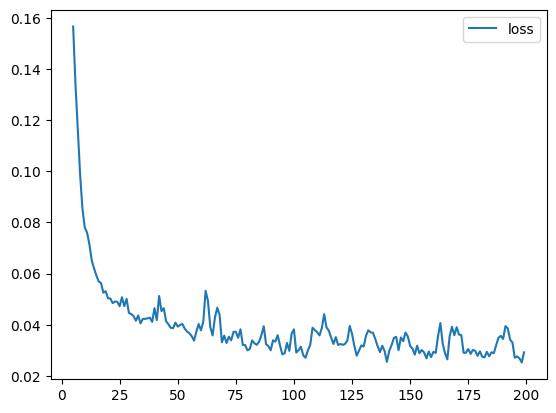

In [6]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss']].plot()